# lasso regression & linear regression 

The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [2]:
# Regression

In [2]:

a=pd.read_csv('car_age_price.csv')
print(a.to_string())

print(a.shape)

     Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
5    2015  350000
6    2016  425000
7    2017  575000
8    2017  509999
9    2017  575000
10   2019  500000
11   2018  500000
12   2017  500000
13   2019  600000
14   2017  475000
15   2017  500000
16   2017  500000
17   2017  550000
18   2019  500000
19   2017  500000
20   2018  500000
21   2019  500000
22   2015  434999
23   2017  550000
24   2017  550000
25   2017  550000
26   2017  550000
27   2017  550000
28   2017  550000
29   2017  550000
30   2019  650000
31   2017  550000
32   2017  550000
33   2017  550000
34   2017  450000
35   2017  550000
36   2017  550000
37   2017  486000
38   2018  475000
39   2020  545000
40   2019  525000
41   2019  600000
42   2018  550000
43   2019  550000
44   2019  550000
45   2018  450000
46   2019  500000
47   2018  450000
48   2016  396000
49   2018  600000
50   2013  325000
51   2018  550000
52   2013  345000
53   2013  345000
54   2017 

In [3]:
a

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
a.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [14]:
a.shape

(112, 2)

In [7]:
a.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
a.columns


Index(['Year', 'Price'], dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

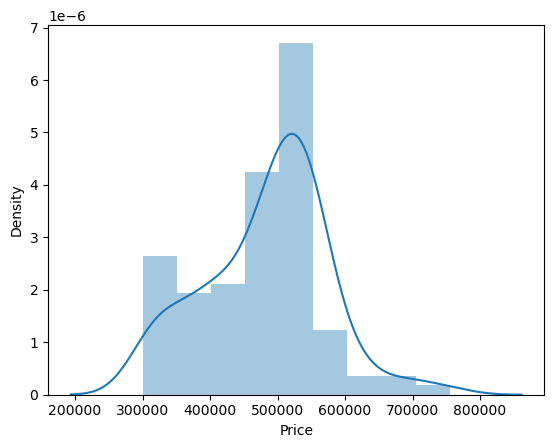

In [6]:
sns.distplot(a.Price)


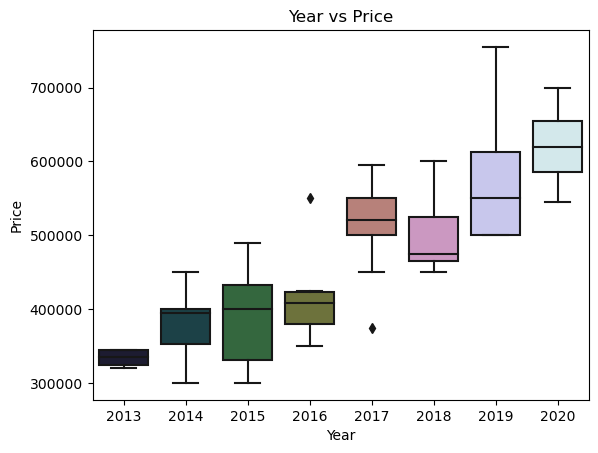

In [7]:
# plt.subplot(11,2,2)
plt.title('Year vs Price')
sns.boxplot(x=a.Year, y=a.Price, palette=("cubehelix"))

plt.show()

In [8]:
X = a['Year'].values.reshape(-1, 1)
y = a['Price'].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [12]:
lasso_reg = Lasso(alpha=0.1)  # You can tune the alpha value for regularization strength
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.1)

In [13]:
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)


In [11]:
print("Linear Regression MSE:", linear_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)


Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506


In [33]:
model_price_2022 = linear_reg.predict([[2022]])


In [31]:
laso=lasso_reg.predict([[2022]])

In [34]:
print("Linear Regression Prediction for Model_price_2022 :", model_price_2022)


Linear Regression Prediction for Model_price_2022 : [731991.98293258]


In [32]:
print("Lasso Regression Prediction for Model_price_2022 :", laso)



Lasso Regression Prediction for Model_price_2022 : [743601.39177768]


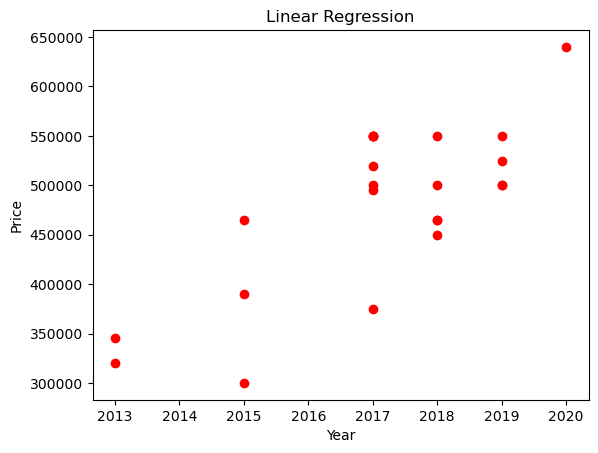

In [17]:
# Plot the scatter plot of the data points
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')


plt.show()

In [27]:
r=0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    model=linear_reg.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    if r2_score(y_test,y_pred)>r:
        r=r2_score(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        modelpredict=model.predict([[2022]])
        
print(r)
        

0.7862976353483219


In [38]:
print('R-square value',r)
print('mean_absolute_error ',mae)


R-square value 0.7862976353483219
mean_absolute_error value 36430.47712326848


36430.47712326848

In [29]:
modelpredict

array([716031.0029383])